### Import Packages

In [1]:
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from  sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

### Data Collection

Load the Dataset into Python with Pandas.


In [2]:
churn = pd.read_excel('churn_dataset.xlsx')

### Data Exploration

In the Data Exploration phase, we will be looking at:
- Understanding the data structure, statistics and quality of the dataset
- Visualizing the data to gain insights
- Checking for missing values

See the first few rows of our dataset.

In [3]:
churn.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


Check for missing values    


In [4]:
churn.isnull().sum()

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

Check for duplicates

In [5]:
churn.duplicated().any()

np.False_

Get a statistical overview of our dataset

In [6]:
churn.describe()

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


Next, we will look into how the target variable and other variables are distributed.

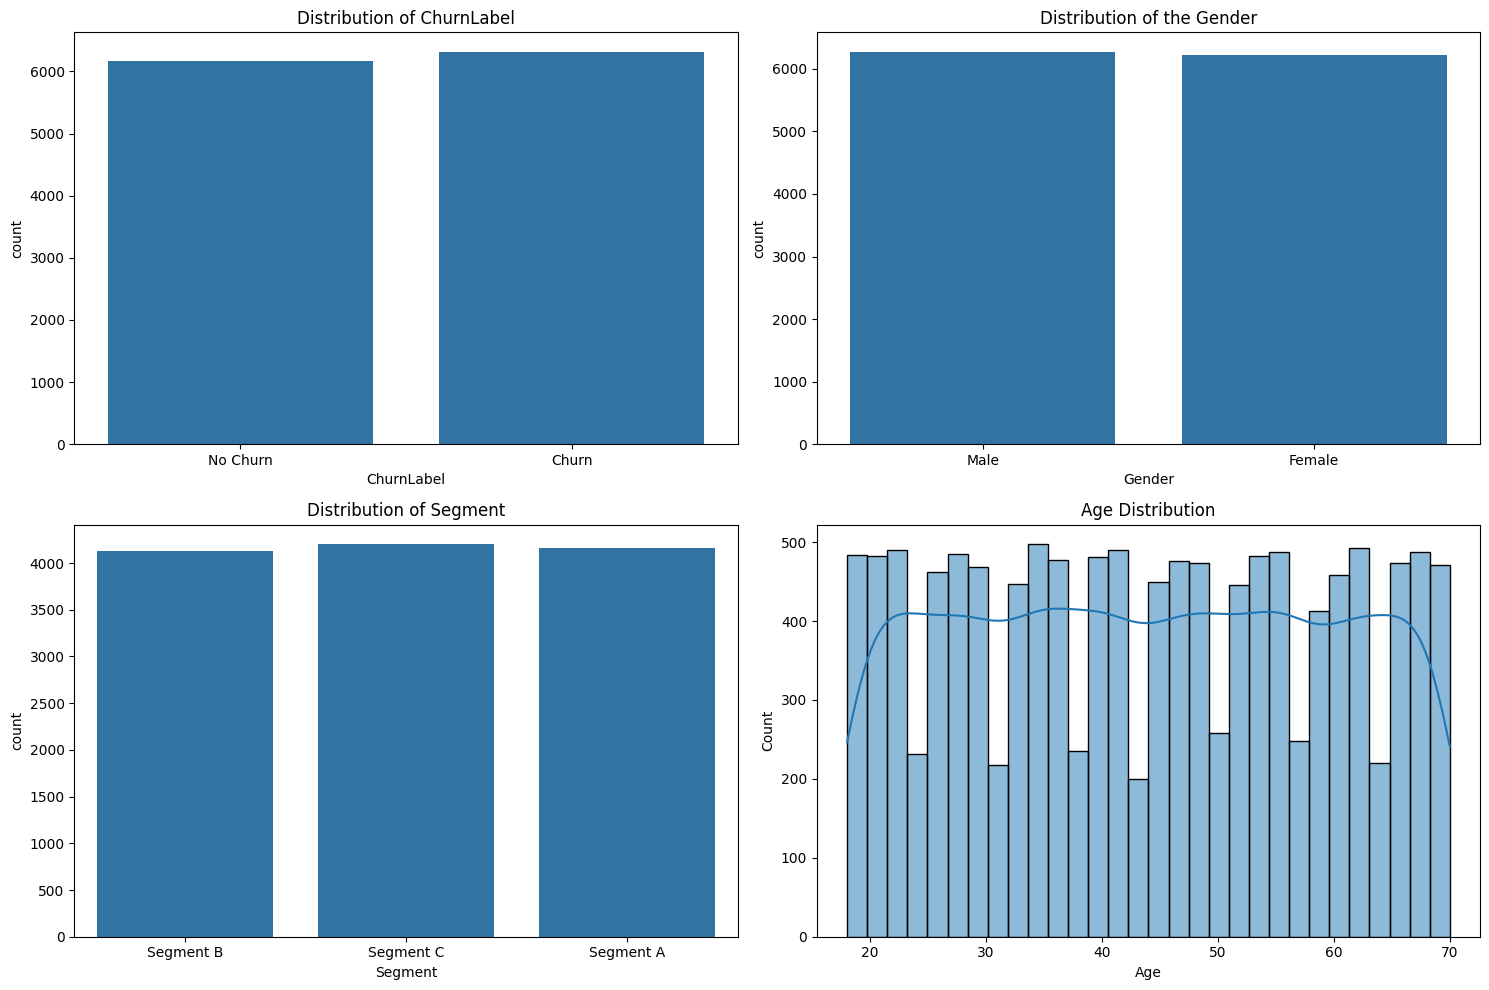

In [7]:
# Setup the figure and axis
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot the distribution of the target variable ChurnLabel
sns.countplot(x='ChurnLabel', data=churn, ax=ax[0,0])
ax[0,0].set_title('Distribution of ChurnLabel')
ax[0,0].set_xticklabels(['No Churn', 'Churn'])

# Plot the distribution of the gender
sns.countplot(x='Gender', data=churn, ax=ax[0,1])
ax[0,1].set_title('Distribution of the Gender')

# Plot distribution of the Segment
sns.countplot(x='Segment', data=churn, ax=ax[1,0])
ax[1,0].set_title('Distribution of Segment')

# Age distribution
sns.histplot(churn['Age'], bins=30, ax=ax[1,1], kde=True)
ax[1,1].set_title('Age Distribution')

plt.tight_layout()

Correlation Analysis: To gather some insights on the relationships between the target label and other labels in the dataset 

In [8]:
#Calculate correlation with ChurnLabel
churn.select_dtypes(include=np.number).corr()


,CustomerID,Age,NPS,ChurnLabel
CustomerID,1.000000,-0.002670,-0.002513,0.001530
Age,-0.002670,1.000000,0.000006,0.010273
NPS,-0.002513,0.000006,1.000000,-0.540703
ChurnLabel,0.001530,0.010273,-0.540703,1.000000


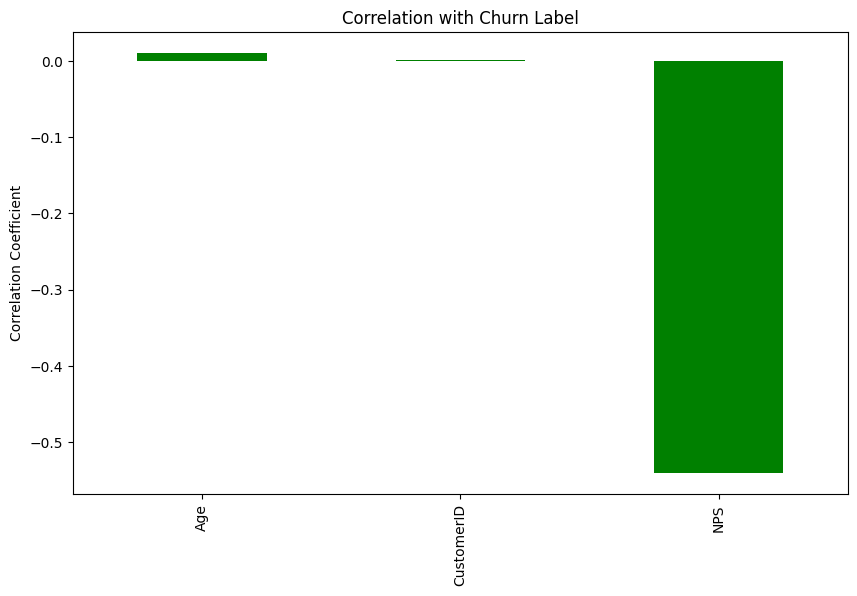

ChurnLabel    1.000000
Age           0.010273
CustomerID    0.001530
NPS          -0.540703
Name: ChurnLabel, dtype: float64

In [9]:
correlation = churn.select_dtypes(include=np.number).corr()['ChurnLabel'].sort_values(ascending=False)

#Plot the correlation
plt.figure(figsize=(10,6))
correlation.drop('ChurnLabel').plot(kind='bar', color='green')
plt.title('Correlation with Churn Label')
plt.ylabel('Correlation Coefficient')
plt.show()

correlation



### Exploring Nested Columns

In [10]:
#List out all the nested columns

nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

#Print out the first value in each column
w1, w2 = 25, 1000
for col in nested_columns:
    row = [col, churn[col].iloc[0]]  # Access the first value in each column
    print('\n| {:<{w1}} | {:<{w2}} |'.format(row[0], str(row[1]), w1=w1, w2=w2))


| PurchaseHistory           | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

Temporal Analysis: Taking a dive into how the churn rate changes over time to observe patterns.

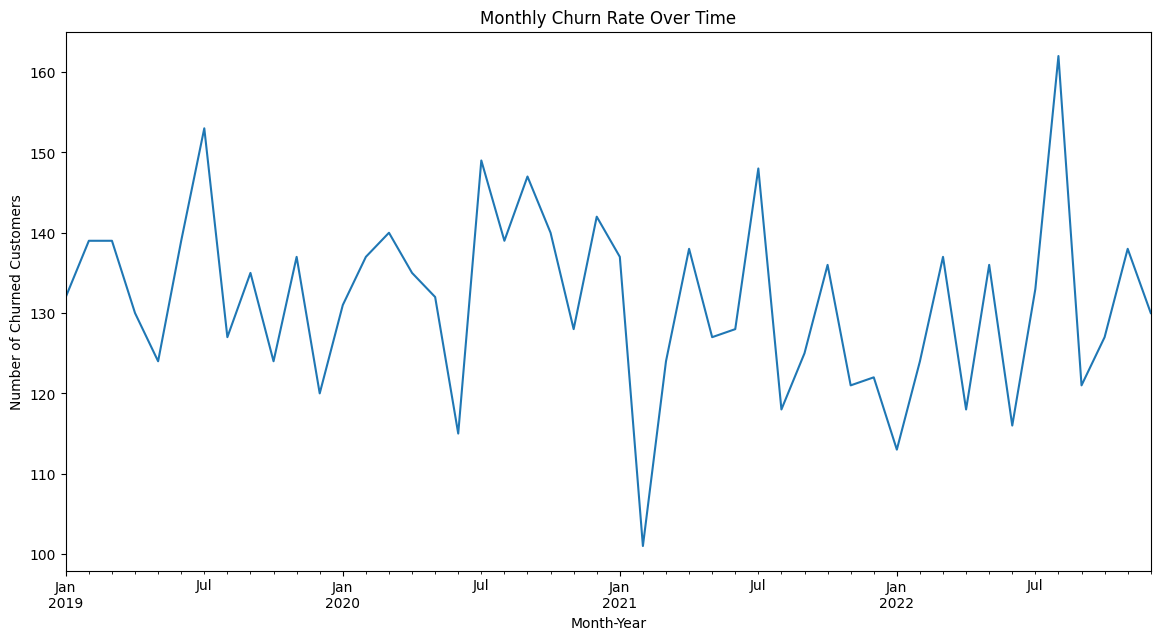

In [11]:
# Convert timestamp to datetime format so that it can be grouped
churn['Timestamp'] = pd.to_datetime(churn['Timestamp'])

# Extract the month-year from the Timestamp
churn['MonthYear'] = churn['Timestamp'].dt.to_period('M')

# Ensure ChurnLabel is numeric (e.g., 0 for no churn, 1 for churn)
churn['ChurnLabel'] = churn['ChurnLabel'].astype(int)

# Group by MonthYear and calculate the churn rate
monthly_churn_rate = churn.groupby('MonthYear')['ChurnLabel'].sum()

# Plot the churn rate over time
plt.figure(figsize=(14,7))
monthly_churn_rate.plot()
plt.title('Monthly Churn Rate Over Time')
plt.ylabel('Number of Churned Customers')
plt.xlabel('Month-Year')
plt.show()

We need to identify patterns between thee customer feedback Rating and ChurnLabel

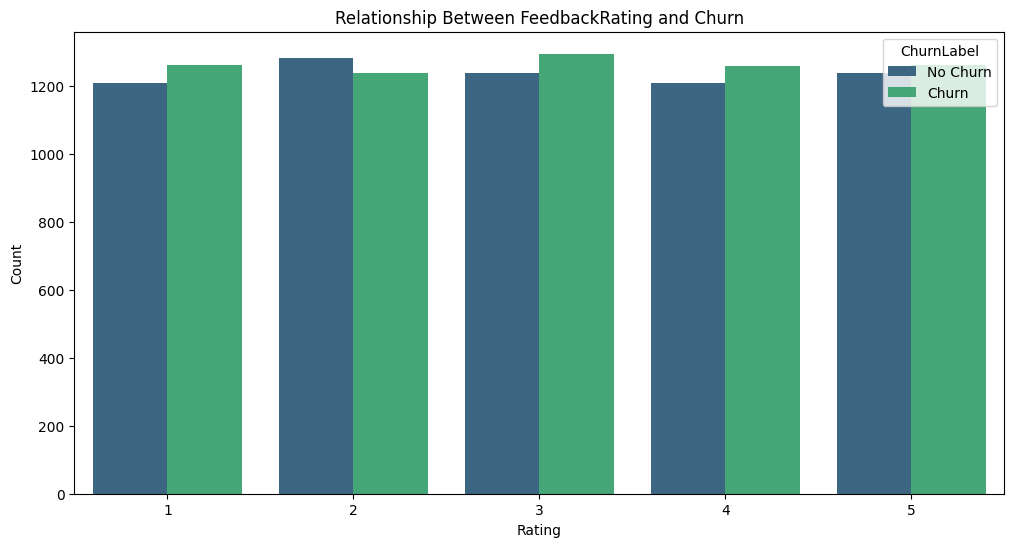

In [12]:
#Extract the ratings from the Feedback column and creating a new column for it
churn['FeedbackRating'] = churn['Feedback'].apply(lambda x: eval(x)['Rating'])

#Plotting the relationship between feedback rating and churn
plt.figure(figsize=(12,6))
sns.countplot(x='FeedbackRating', data=churn, hue='ChurnLabel', palette='viridis')
plt.title('Relationship Between FeedbackRating and Churn')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='ChurnLabel', loc='upper right', labels=['No Churn', 'Churn'])

There appears to be no relationship between customer feedback and Churn.

### Data Preprocessing and Feature Engineering 
- Create new features that may have predictive power
- Convert categorical variables to numeric variables using encoding techniques
- Scale or normalize numeric variables if necessary
- Split the data into training and test subsets
- Remove irrelevant features from the data 

We begin by converting nested values from string format to list or disctionaries using literal_eval function

In [13]:
#List the  nested columns

nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

#Apply the literal_eval function
for feature in nested_columns:
    churn[feature] = churn[feature].apply(literal_eval)

More features will be extracted from the Dataset

In [14]:
#PurchaseHistory
churn['PurchasedProducts'] = churn['PurchaseHistory'].apply(lambda x: '|'.join([i['Product'] for i in x]))
churn['PurchaseFrequency'] = churn['PurchaseHistory'].apply(lambda x: sum([i['Frequency'] for i in x]))
churn['PurchaseValue'] = churn['PurchaseHistory'].apply(lambda x: sum ([i['Value'] for i in x]))

#SubscriptionDetails
churn['SubscriptionPlan'] = churn['SubscriptionDetails'].apply (lambda x: x['Plan'])
churn['SubscriptionStartDate'] = churn['SubscriptionDetails'].apply(lambda x: x['Start_Date'])
churn['SubscriptionEndDate'] = churn['SubscriptionDetails'].apply (lambda x: x['End_Date' ])
churn['SubscriptionDuration'] = (pd.to_datetime(churn['SubscriptionEndDate']) - pd.to_datetime (churn['SubscriptionStartDate'])).dt.days

#WebsiteUsage
churn['WebsitePageViews'] = churn['WebsiteUsage'].apply(lambda x: x[ 'PageViews'])
churn['WebsiteTimeSpent'] = churn['WebsiteUsage'].apply(lambda x: x[ 'TimeSpent(minutes)'])

#EngagementMetrics
churn['EngagementMetricsLogins'] = churn['EngagementMetrics'].apply(lambda x: x['Logins'])
churn['EngagementMetricsFrequency'] = churn['EngagementMetrics'].apply (lambda x: x['Frequency'])

# Feedback
churn['FeedbackRating'] = churn['Feedback'].apply (lambda x: x['Rating'])
churn['FeedbackComment'] = churn ['Feedback' ].apply (lambda x: x['Comment'])

#MarketingCommunication
churn['MarketingCommunicationNo0fEmails'] = churn['MarketingCommunication'].apply (lambda x: len(x))
churn['MarketingCommunication0penClickDiff'] = churn['MarketingCommunication'].apply (
lambda x: np.mean([
    (pd.to_datetime (i ['Email_Clicked'])
     - pd.to_datetime (i['Email_Opened'])).days for i in x
     ])
)

churn['MarketingCommunicationSentOpenDiff']= churn['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Opened'])  
         - pd.to_datetime(i['Email_Sent'])).days for i in x
    ])
)    

Special extraction frm three columns
- ServiceInteractions
- PaymentHistory
- ClickStreamData

Check for the unique values in these columns

In [15]:
# Get all unique ServiceInteraction 'Types'
service_interaction_types = churn['ServiceInteractions'].apply(lambda x: list(set ([i['Type'] for i in x])))
service_interaction_types = service_interaction_types.to_list()
unique_service_interaction_type = []
for i in service_interaction_types:
    unique_service_interaction_type.extend(i)
unique_service_interaction_type = list(set(unique_service_interaction_type))
print('All unique Service Interaction Types:', unique_service_interaction_type)

# Get all unique PaymentHistory 'Method'
payment_history_methods = churn['PaymentHistory'].apply(lambda x: list(set([i['Method'] for i in x])))
payment_history_methods = payment_history_methods.to_list()
unique_payment_history_methods = []
for i in payment_history_methods:
    unique_payment_history_methods.extend(i)
unique_payment_history_methods = list(set(unique_payment_history_methods))
print('All unique Payment History Methods:' , unique_payment_history_methods)

# Get all unique ClickstreamData 'Action'
clickstream_data_actions = churn['ClickstreamData'].apply(lambda x: list(set([i['Action'] for i in x])))
clickstream_data_actions = clickstream_data_actions.to_list()
unique_clickstream_data_actions = []
for i in clickstream_data_actions:
    unique_clickstream_data_actions.extend(i)
unique_clickstream_data_actions = list(set(unique_clickstream_data_actions))
print('All unique Clickstream Data Actions:' , unique_clickstream_data_actions)

All unique Service Interaction Types: ['Email', 'Chat', 'Call']
All unique Payment History Methods: ['Credit Card', 'Bank Transfer', 'PayPal']
All unique Clickstream Data Actions: ['Search', 'Click', 'Add to Cart']


From these three columns, we will proceed to further encode

In [16]:
#ServiceInteractions
for usit in unique_service_interaction_type: 
    churn[f'ServiceInteractions_{usit}'] = churn['ServiceInteractions'].apply(lambda x:len([i for i in x if i['Type']==usit]))

#PaymentHistory
churn['PaymentHistoryNoOfLatePayments'] = churn['PaymentHistory'].apply(lambda x: sum(i['Late_Payments']for i in x))
churn['PaymentHistoryAvgNoOfLatePayments'] = churn['PaymentHistory'].apply (lambda x: np.mean ([i['Late_Payments'] for i in x]))

#ClickstreamData
for ucda in unique_clickstream_data_actions:
    churn[f'ClickStreamData_{ucda}']=churn['ClickstreamData'].apply(lambda x: len([i for i in x if i['Action']==ucda]))

Preview a subset of the new data

In [17]:
pd.set_option('display.max_columns', None)
churn.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,SubscriptionDetails,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp,MonthYear,FeedbackRating,PurchasedProducts,PurchaseFrequency,PurchaseValue,SubscriptionPlan,SubscriptionStartDate,SubscriptionEndDate,SubscriptionDuration,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,EngagementMetricsFrequency,FeedbackComment,MarketingCommunicationNo0fEmails,MarketingCommunication0penClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Email,ServiceInteractions_Chat,ServiceInteractions_Call,PaymentHistoryNoOfLatePayments,PaymentHistoryAvgNoOfLatePayments,ClickStreamData_Search,ClickStreamData_Click,ClickStreamData_Add to Cart
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...","{'Plan': 'Express', 'Start_Date': '2020-06-08'...","[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49,2020-01,1,"Frozen Cocktail Mixes|Printer, Copier & Fax Ma...",38,3994.72,Express,2020-06-08,2022-10-27,871,49,15,19,Weekly,I move baby go small big. Office institution s...,8,319.0,818.0,1,2,1,40,13.333333,12,4,8
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...","{'Plan': 'Pro', 'Start_Date': '2021-07-21', 'E...","[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03,2019-01,2,Watercraft Polishes|Baby Protective Wear|Footbags,4,2844.35,Pro,2021-07-21,2022-05-07,290,100,9,9,Weekly,Wish what bag cut life. Statement might opport...,9,88.0,110.0,10,4,5,10,3.333333,7,9,8
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...","{'Plan': 'Essential', 'Start_Date': '2019-10-0...","[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10,2019-04,4,"Vehicle Waxes, Polishes & Protectants|Pipe Cap...",14,1866.52,Essential,2019-10-05,2020-08-19,319,1,97,19,Monthly,Some Democrat guess but short. Whether behind ...,8,117.0,333.0,1,1,1,8,2.666667,7,3,2
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...","{'Plan': 'Smart', 'Start_Date': '2020-01-14', ...","[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28,2020-03,1,Mouthwash|Crêpe & Blini Pans|Vehicle Performan...,28,1378.64,Smart,2020-01-14,2022-03-27,803,25,31,4,Dail

Preview all columns we have now

In [18]:
churn.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp', 'MonthYear',
       'FeedbackRating', 'PurchasedProducts', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'SubscriptionStartDate',
       'SubscriptionEndDate', 'SubscriptionDuration', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackComment',
       'MarketingCommunicationNo0fEmails',
       'MarketingCommunication0penClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Email',
       'ServiceInteractions_Chat', 'ServiceInteractions_Call',
       'PaymentHistoryNoOfLatePayments', 'PaymentHistoryAvgNoOfLatePayments',
       'ClickStreamData_Se

In [19]:
churn_ = churn[[
'Age',
'Gender',
'NPS',
'ChurnLabel',
'PurchaseFrequency',
'PurchaseValue',
'WebsitePageViews',
'WebsiteTimeSpent',
'EngagementMetricsLogins',
'EngagementMetricsFrequency',
'FeedbackRating',
'ServiceInteractions_Call',
'ServiceInteractions_Email',
'ServiceInteractions_Chat',
'PaymentHistoryNoOfLatePayments',
'SubscriptionDuration',
]]

pd.set_option('display.max_columns', None)
churn_.head()

,Age,Gender,NPS,ChurnLabel,PurchaseFrequency,PurchaseValue,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,EngagementMetricsFrequency,FeedbackRating,ServiceInteractions_Call,ServiceInteractions_Email,ServiceInteractions_Chat,PaymentHistoryNoOfLatePayments,SubscriptionDuration
0,31,Male,3,1,38,3994.72,49,15,19,Weekly,1,1,1,2,40,871
1,66,Female,6,0,4,2844.35,100,9,9,Weekly,2,5,10,4,10,290
2,36,Female,3,0,14,1866.52,1,97,19,Monthly,4,1,1,1,8,319
3,62,Female,1,1,28,1378.64,25,31,4,Daily,1,17,18,24,79,803
4,68,Female,3,0,39,2425.05,77,51,12,Weekly,3,4,5,1,2,580


Let's see the names of all the columns we have now

In [20]:
churn_.columns

Index(['Age', 'Gender', 'NPS', 'ChurnLabel', 'PurchaseFrequency',
       'PurchaseValue', 'WebsitePageViews', 'WebsiteTimeSpent',
       'EngagementMetricsLogins', 'EngagementMetricsFrequency',
       'FeedbackRating', 'ServiceInteractions_Call',
       'ServiceInteractions_Email', 'ServiceInteractions_Chat',
       'PaymentHistoryNoOfLatePayments', 'SubscriptionDuration'],
      dtype='object')

In [21]:
churn_.loc[0]

Age                                    31
Gender                               Male
NPS                                     3
ChurnLabel                              1
PurchaseFrequency                      38
PurchaseValue                     3994.72
WebsitePageViews                       49
WebsiteTimeSpent                       15
EngagementMetricsLogins                19
EngagementMetricsFrequency         Weekly
FeedbackRating                          1
ServiceInteractions_Call                1
ServiceInteractions_Email               1
ServiceInteractions_Chat                2
PaymentHistoryNoOfLatePayments         40
SubscriptionDuration                  871
Name: 0, dtype: object

Let's check for number of unique values in our categorical columns in comparison to the length of the dataset

In [22]:
churn_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             12483 non-null  int64  
 1   Gender                          12483 non-null  object 
 2   NPS                             12483 non-null  int64  
 3   ChurnLabel                      12483 non-null  int64  
 4   PurchaseFrequency               12483 non-null  int64  
 5   PurchaseValue                   12483 non-null  float64
 6   WebsitePageViews                12483 non-null  int64  
 7   WebsiteTimeSpent                12483 non-null  int64  
 8   EngagementMetricsLogins         12483 non-null  int64  
 9   EngagementMetricsFrequency      12483 non-null  object 
 10  FeedbackRating                  12483 non-null  int64  
 11  ServiceInteractions_Call        12483 non-null  int64  
 12  ServiceInteractions_Email       

Encoding categorical columns

In [23]:

gender_map = {'Male': 0, 'Female': 1}
engagement_frequency_map = {'Weekly': 0, 'Daily': 1,'Monthly': 2}

churn_.loc[:, 'Gender'] = churn_.loc[:, 'Gender'].map(gender_map)
churn_.loc[:, 'EngagementMetricsFrequency'] = churn_.loc[:, 'EngagementMetricsFrequency'].map(engagement_frequency_map)

In [24]:
churn_.loc[0]

Age                                    31
Gender                                  0
NPS                                     3
ChurnLabel                              1
PurchaseFrequency                      38
PurchaseValue                     3994.72
WebsitePageViews                       49
WebsiteTimeSpent                       15
EngagementMetricsLogins                19
EngagementMetricsFrequency              0
FeedbackRating                          1
ServiceInteractions_Call                1
ServiceInteractions_Email               1
ServiceInteractions_Chat                2
PaymentHistoryNoOfLatePayments         40
SubscriptionDuration                  871
Name: 0, dtype: object

Plot correlation matrix

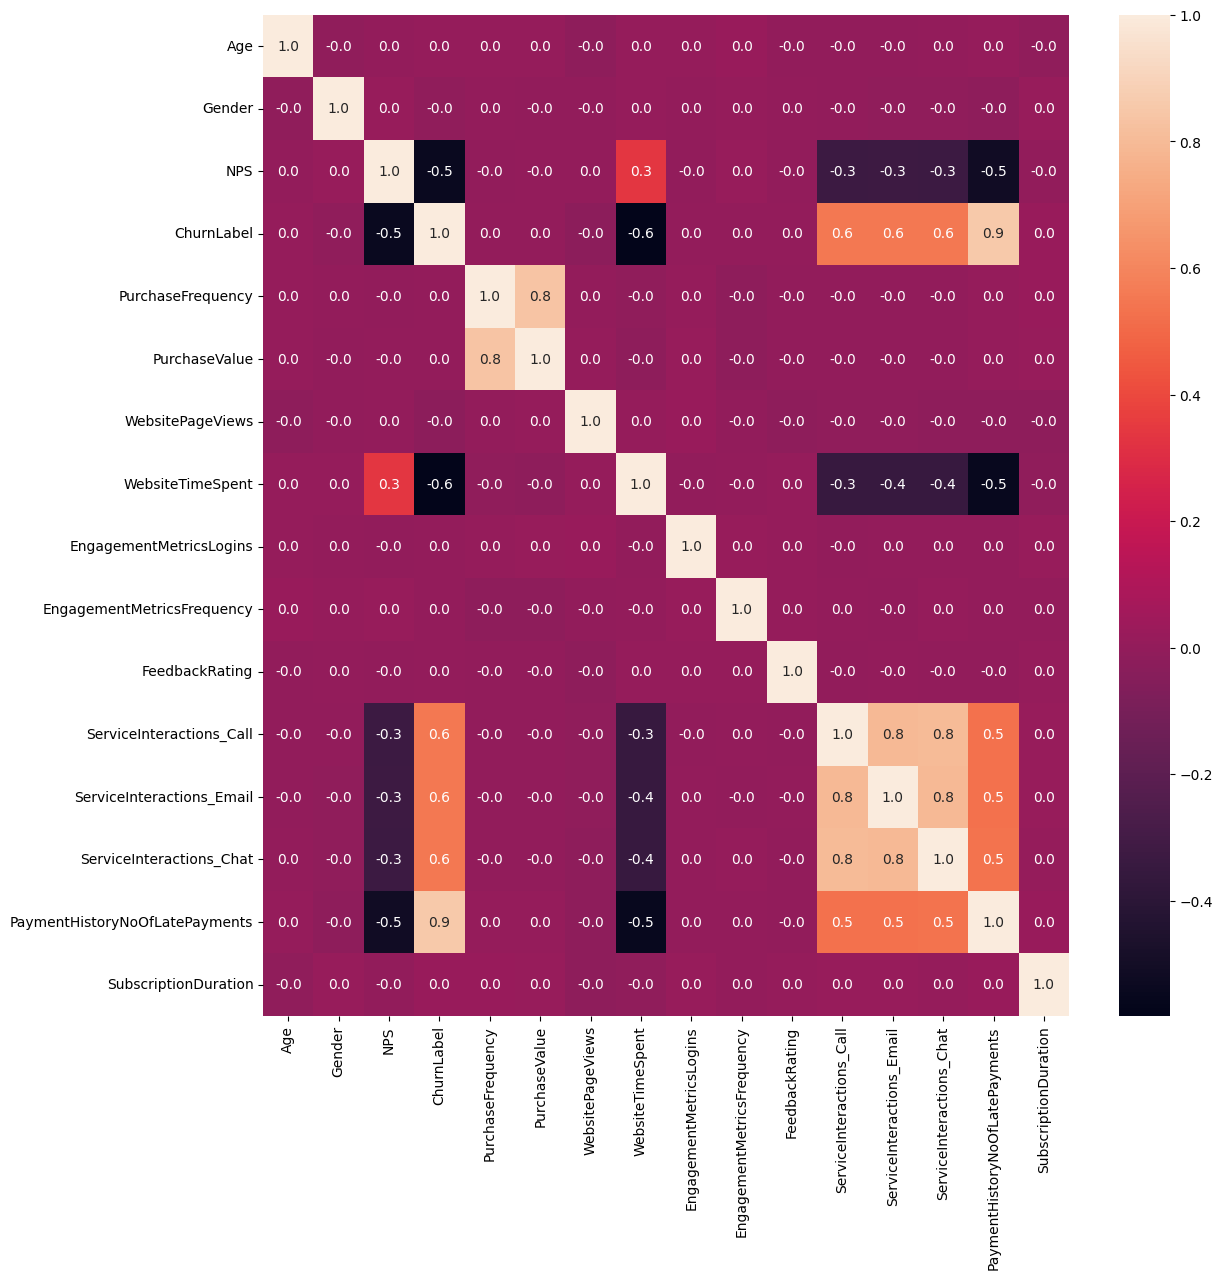

In [25]:
churn_corr = churn_.corr()
fig, ax = plt. subplots(figsize = (13, 13))
sns.heatmap (churn_corr, annot=True, fmt= '.1f', ax=ax) 
plt.show()

Split data into train, test and validation sets

In [26]:
x = churn_.drop(columns=['ChurnLabel'])
y = churn_['ChurnLabel']
x_train, x_other, y_train, y_other = train_test_split(x, y, train_size=0.8, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_other, y_other,test_size=0.3, random_state=42)

In [29]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_val = ss.transform(x_val)
x_test = ss.transform(x_test)

### Modelling

Two different models for modelling:
- Logistic Regression
- DecisionTreeClassifier

Metrics:
- Accuracy Score
- Precision Score
- Recall Score
- F1 Score


In [30]:
def evaluate (x, y, model, subset=''):
    y_pred = model.predict(x)
    
    print(f'{subset} Accuracy Score: {accuracy_score(y_pred, y)}') 
    print(f'{subset} Precision Score: {precision_score(y_pred, y)}') 
    print(f'{subset} Recall Score: {recall_score(y_pred, y)}') 
    print (f'{subset} F1 Score: {f1_score (y_pred, y)}\n')

### Modelling with Logistic Regression

In [31]:
#Build the model
lr = LogisticRegression()
lr.fit(x_train, y_train)

#Evaluate the model on train and validation subsets
evaluate(x_train, y_train, lr, 'Train')
evaluate(x_val, y_val, lr, 'Validation')



Train Accuracy Score: 0.9705587822952133
Train Precision Score: 0.965150620200827
Train Recall Score: 0.976688583383144
Train F1 Score: 0.9708853238265003

Validation Accuracy Score: 0.968
Validation Precision Score: 0.9696969696969697
Validation Recall Score: 0.9643835616438357
Validation F1 Score: 0.967032967032967



### Modelling with Decision Tree

In [32]:
#Build the model
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train, y_train)

#Evaluate on train and validation subsets
evaluate(x_train, y_train, dt, subset = 'Train')
evaluate(x_val, y_val, dt, 'Validation')

Train Accuracy Score: 0.9767674744642499
Train Precision Score: 0.9767670801338846
Train Recall Score: 0.9775369458128079
Train F1 Score: 0.9771518613354343

Validation Accuracy Score: 0.9693333333333334
Validation Precision Score: 0.9724517906336089
Validation Recall Score: 0.9644808743169399
Validation F1 Score: 0.9684499314128944



### Evaluation on the Test Set

In [33]:
evaluate(x_test, y_test, lr, subset = 'LogisticRegression Test')
evaluate(x_test, y_test, dt, subset = 'DecisionTreeClassifier Test')

LogisticRegression Test Accuracy Score: 0.9690898683457355
LogisticRegression Test Precision Score: 0.9644495412844036
LogisticRegression Test Recall Score: 0.9733796296296297
LogisticRegression Test F1 Score: 0.9688940092165899

DecisionTreeClassifier Test Accuracy Score: 0.9725243274184316
DecisionTreeClassifier Test Precision Score: 0.9724770642201835
DecisionTreeClassifier Test Recall Score: 0.9724770642201835
DecisionTreeClassifier Test F1 Score: 0.9724770642201835



Next we plot the confusion matrix 

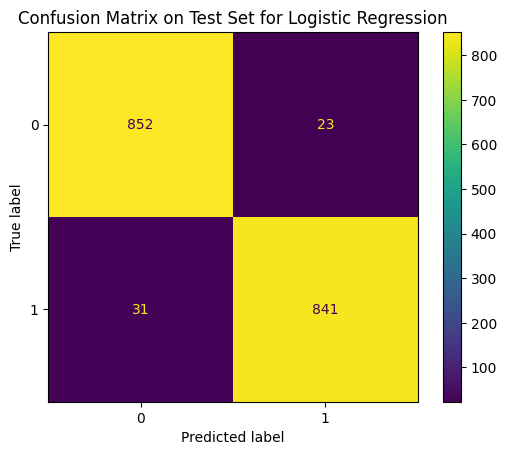

In [34]:
lr_y_pred = lr.predict(x_test)
logistic_regression_confusion_matrix = confusion_matrix(y_test, lr_y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=logistic_regression_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test Set for Logistic Regression') 
plt.show()

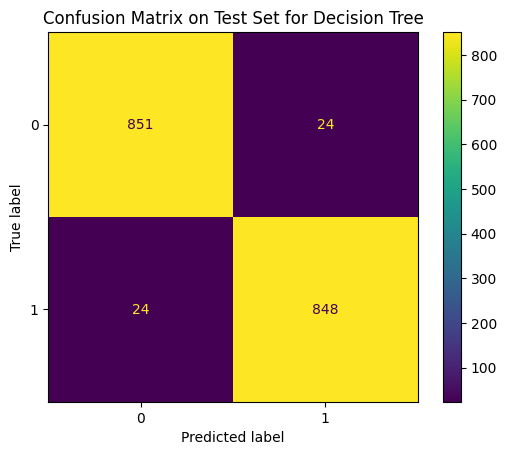

In [35]:
dt_y_pred = dt.predict(x_test)
decision_tree_confusion_matrix = confusion_matrix(y_test, dt_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=decision_tree_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test Set for Decision Tree')
plt.show()

### Lets Save Our Model

- We will be saving the DecisionTreeClassifier Model as it has a higher accuracy.

In [37]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(dt, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(ss, f)

with open('model2.pkl', 'wb') as f:
    pickle.dump(lr, f)    